K nearest Neighbors (kNN) works based on calculating distance between given test data point and all the training samples. We, then, collect first K closest points from training set and the majority vote gives you the predicted class for a given test data point.

For more intuitive explanation, please follow previous post :

   > [How kNN works ?](https://sijanb.com.np/posts/how-k-nearest-neighbors-works/)



In [1]:
import math
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# making results reproducible
np.random.seed(42)

In [23]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None, sep=',')

df.columns = ['CLASS', 'ALCOHOL_LEVEL', 'MALIC_ACID', 'ASH', 'ALCALINITY','MAGNESIUM', 'PHENOLS', 
              'FLAVANOIDS', 'NON_FLAVANOID_PHENOL', 'PROANTHOCYANINS', 'COLOR_INTENSITY', 
              'HUE', 'OD280/OD315_DILUTED','PROLINE']

# Let us use only two features : 'ALCOHOL_LEVEL', 'MALIC_ACID' for this problem
df = df[['CLASS', 'ALCOHOL_LEVEL', 'MALIC_ACID']]
df.head()

,CLASS,ALCOHOL_LEVEL,MALIC_ACID
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


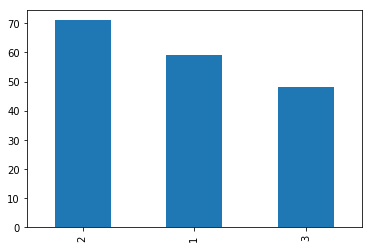

In [24]:
# class distribution looks okay; not so imbalanced.
df['CLASS'].value_counts().plot(kind="bar")
plt.show()

<!-- TEASER_END -->

In [25]:
# we are using 10% of the data for the testing purpose

train_sample_idx = np.random.choice(df.index, size=int(df.shape[0]*0.9), replace=False)
train_data, test_data = df.iloc[train_sample_idx], df.drop(train_sample_idx)

# get features and label from train/test data
X_train, y_train = train_data.drop('CLASS', axis=1), train_data['CLASS']
X_test, y_test = test_data.drop('CLASS', axis=1), test_data['CLASS']

In [26]:
X_train.shape, X_test.shape

((160, 2), (18, 2))

### 1. Using Python from Scratch

In [27]:
def euclidean_distance(vector1, vector2):
    '''calculate the euclidean distance
    input: numpy.arrays or lists
    return: euclidean distance
    '''
    dist = [(a - b)**2 for a, b in zip(vector1, vector2)]
    dist = math.sqrt(sum(dist))
    return dist

class KNN:
    def __init__(self, K):
        self.K = K
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict_instance(self, test_instance):
        inputs = self.X_train.copy()
        # calculate L2 norm between all training points and given test_point
        inputs['distance'] = np.linalg.norm(X_train.values-test_instance.values, axis=1)
        
        # concatenate inputs and labels before sorting the distances
        inputs = pd.concat([inputs, self.y_train], axis=1)

        # sort based on distance
        inputs = inputs.sort_values('distance', ascending=True)

        # pick k neighbors
        neighbors = inputs.head(self.K)

        # get list from dataframe column
        classes = neighbors['CLASS'].tolist()

        # create counter of labels
        majority_count = Counter(classes)
        
        return majority_count.most_common(1).pop()[0]
        
        
    def predict(self, X_test):
        predictions = np.zeros(X_test.shape[0])
        # we want out index to be start from 0
        X_test.reset_index(drop=True, inplace=True)
        for index, row in X_test.iterrows():
            predictions[index] = self.predict_instance(row)
        return predictions

In [28]:
knn = KNN(3)
knn.fit(X_train, y_train)

In [29]:
predictions = knn.predict(X_test)
true_values = y_test.to_numpy()
accuracy = np.mean(predictions == true_values)

In [30]:
accuracy 

0.7777777777777778

### 2. Using scikit-learn

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn_sklearn = KNeighborsClassifier(n_neighbors=3)

In [33]:
knn_sklearn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [34]:
predictions = knn_sklearn.predict(X_test)
accuracy = np.mean(predictions == true_values)
accuracy

0.7777777777777778